In [80]:
import pandas as pd
import scipy as sp
import numpy as np
import graphviz 
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculatio
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [81]:
#Preparing data
breast_cancer = load_breast_cancer()
data_play_tennis  = pd.read_csv('play_tennis.csv')

#convert breast cancer data to pandas dataframe
data_breast_cancer = pd.DataFrame(breast_cancer['data'], columns=breast_cancer['feature_names'])
data_breast_cancer['target'] = breast_cancer['target']

In [82]:
#Breast Cancer Data 
data_breast_cancer.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [83]:
# Play Tennis Data Head

Le = LabelEncoder()
data_play_tennis = data_play_tennis.drop(columns=['day'])
data_play_tennis['outlook'] = Le.fit_transform(data_play_tennis['outlook'])
data_play_tennis['temp'] = Le.fit_transform(data_play_tennis['temp'])
data_play_tennis['humidity'] = Le.fit_transform(data_play_tennis['humidity'])
data_play_tennis['wind'] = Le.fit_transform(data_play_tennis['wind'])
data_play_tennis['play'] = Le.fit_transform(data_play_tennis['play'])
data_play_tennis.head()

,outlook,temp,humidity,wind,play
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


In [84]:
#Split breast cancer to training and testing data
y1 = data_breast_cancer.target
x1 = data_breast_cancer.drop('target', axis = 1)

x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2)

print("shape of original dataset :", data_breast_cancer.shape)
print("shape of input - training set", x1_train.shape)
print("shape of output - training set", y1_train.shape)
print("shape of input - testing set", x1_test.shape)
print("shape of output - testing set", y1_test.shape)

shape of original dataset : (569, 31)
shape of input - training set (455, 30)
shape of output - training set (455,)
shape of input - testing set (114, 30)
shape of output - testing set (114,)


In [110]:
#Split play tennis to training and testing data
y2 = data_play_tennis.play
x2 = data_play_tennis.drop('play', axis = 1)

x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.2)

print("shape of original dataset :", data_play_tennis.shape)
print("shape of input - training set", x2_train.shape)
print("shape of output - training set", y2_train.shape)
print("shape of input - testing set", x2_test.shape)
print("shape of output - testing set", y2_test.shape)

shape of original dataset : (14, 5)
shape of input - training set (11, 4)
shape of output - training set (11,)
shape of input - testing set (3, 4)
shape of output - testing set (3,)


Accuracy: 0.9473684210526315


[Text(0.6064814814814815, 0.9375, 'X[20] <= 16.795\ngini = 0.474\nsamples = 455\nvalue = [176, 279]'),
 Text(0.39814814814814814, 0.8125, 'X[27] <= 0.136\ngini = 0.181\nsamples = 299\nvalue = [30, 269]'),
 Text(0.2037037037037037, 0.6875, 'X[29] <= 0.055\ngini = 0.038\nsamples = 258\nvalue = [5, 253]'),
 Text(0.16666666666666666, 0.5625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.24074074074074073, 0.5625, 'X[13] <= 38.605\ngini = 0.031\nsamples = 257\nvalue = [4, 253]'),
 Text(0.14814814814814814, 0.4375, 'X[14] <= 0.003\ngini = 0.016\nsamples = 246\nvalue = [2, 244]'),
 Text(0.07407407407407407, 0.3125, 'X[19] <= 0.001\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.037037037037037035, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.1111111111111111, 0.1875, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.2222222222222222, 0.3125, 'X[21] <= 33.105\ngini = 0.008\nsamples = 240\nvalue = [1, 239]'),
 Text(0.18518518518518517, 0.1875, 'gini = 0.0\nsamples =

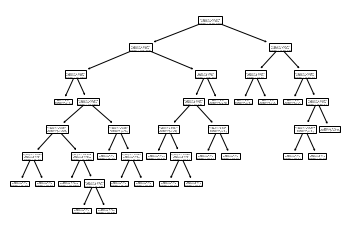

In [114]:
#Decision Tree Classifier - Breast Cancer

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x1_train, y1_train)
y_pred_1 = clf.predict(x1_test)
print("Accuracy:",metrics.accuracy_score(y1_test, y_pred_1))
tree.plot_tree(clf)

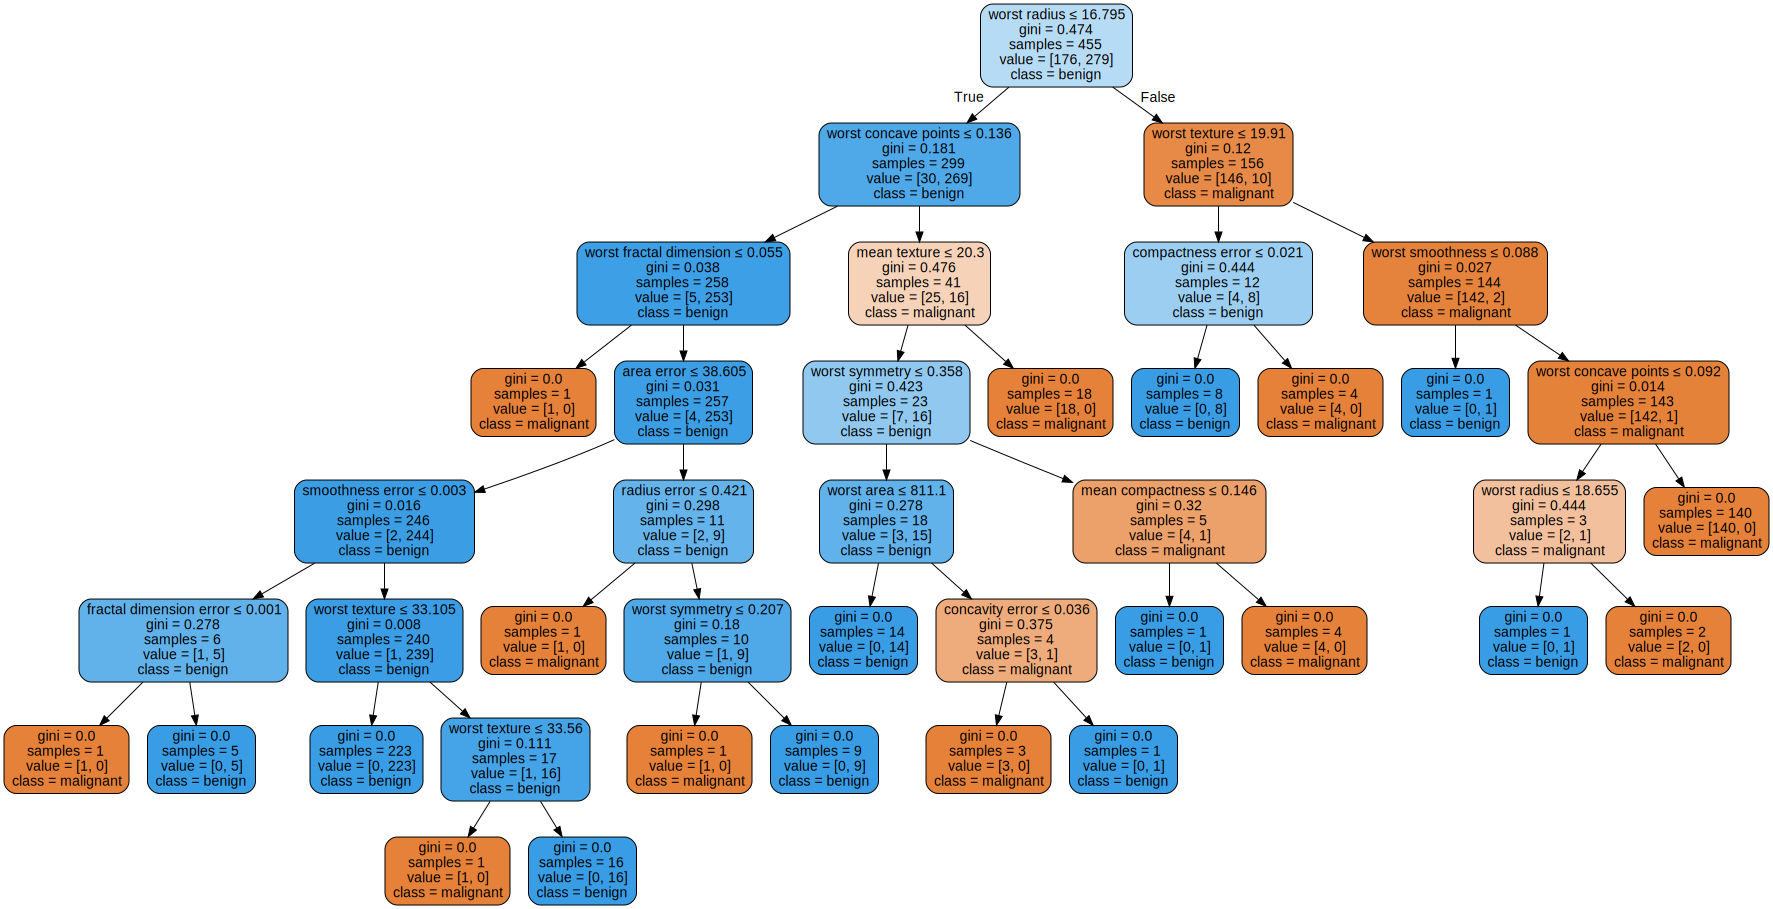

In [121]:

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("breast_cancer_DecisionTreeClassifier") 

dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=breast_cancer.feature_names,  
                      class_names=breast_cancer.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Accuracy: 0.3333333333333333


[Text(0.5555555555555556, 0.875, 'X[2] <= 0.5\ngini = 0.496\nsamples = 11\nvalue = [5, 6]'),
 Text(0.3333333333333333, 0.625, 'X[0] <= 1.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.2222222222222222, 0.375, 'X[3] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7777777777777778, 0.625, 'X[3] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.6666666666666666, 0.375, 'X[1] <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5555555555555556, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.7777777777777778, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8888888888888888, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

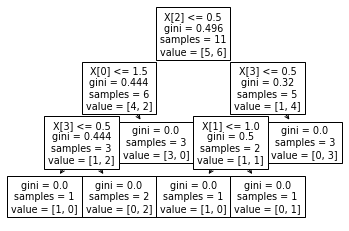

In [119]:
#Decision Tree Classifier - Play Tennis

clf2 = tree.DecisionTreeClassifier()
clf2 = clf2.fit(x2_train, y2_train)
y_pred_2 = clf2.predict(x2_test)
print("Accuracy:",metrics.accuracy_score(y2_test, y_pred_2))
tree.plot_tree(clf2)

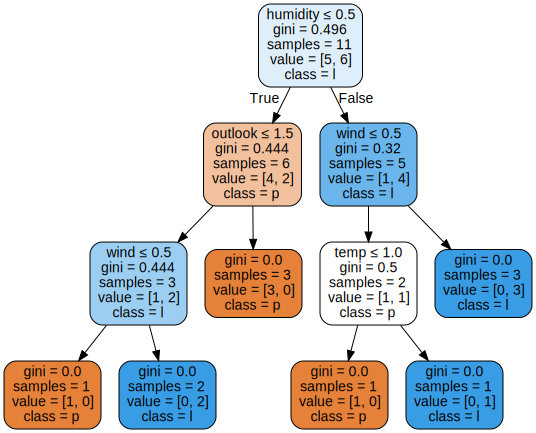

In [120]:
dot_data = tree.export_graphviz(clf2, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("play_tennis_DecisionTreeClassifier") 

dot_data = tree.export_graphviz(clf2, out_file=None, 
                      feature_names=x2.columns.values.tolist(),
                      class_names="play",
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 